In [304]:
cs1 = [[150,113,23],
       [31,206,203],
       [255,0,127],
       [115,194,251],
       [197,75,140],
       [226,88,34],
       [135,206,235],
       [255,36,0],
       [173,216,230],
       [207,16,32],
       [0,255,239],
       [242,133,0]]
cs2 = [[255,253,208],
       [30,144,255],
       [237,201,175],
       [16,52,166],
       [194,178,128],
       [229,170,112],
       [17,100,180],
       [255,215,0],
       [93,138,168],
       [251,206,177],
       [0,112,255],
       [227,218,201]]
axis_cs = [[142,244,251],	
	   [ 64, 64, 64],
	   [200,200,200],
	   [ 64, 64, 64],
	   [200,200,200],
	   [200,200,200],
 	   [ 16, 32,128],
	   [200,200,200],
	   [ 64, 64, 64],
	   [200,200,200],
	   [ 64, 64, 64],
	   [200,200,200]]       
       

In [203]:
def layout_vertical(st_note, split_structure, x_step, y_step, z_step, jump = 0, excl = [-1,-1,-1]):
    return [(st_note + jump*z + x*y_step[z] + q*x_step[z] + y*z_step[z]) if not(x == excl[0] and y ==excl[1] and z ==excl[2]) else 0 for q in range(6) for y in range(2) for z in range(2) for x in range(split_structure[z][y])][:-sum(split_structure[x][1] for x in range(2))]

def layout_horizontal(st_note, x_step, y_step, z_step, jump = 0 , split = -1):
    s = (split-1)/2-1
    return [st_note + jump*(q>s) + q*x_step[(q>s)] + x*y_step[(q>s)] + z*z_step[(q>s)] for q in range(6) for z in range(2) for x in range([6,5][z])][:-5]

def note_colours(notes, cs, adj = True):
    if adj:
        cs = [[round(cs[y][x] *79/255) for x in range(3)] for y in range(len(cs1))]
    return [[cs[x % 12][y] if x > 0 else 0 for x in notes] for y in range(3)]

In [314]:
notes = layout_vertical(36, [[3,2],[3,3]], [1,1], [9,-9], [5,5], 3*12+3)
r, g, b, = note_colours(notes, axis_cs)

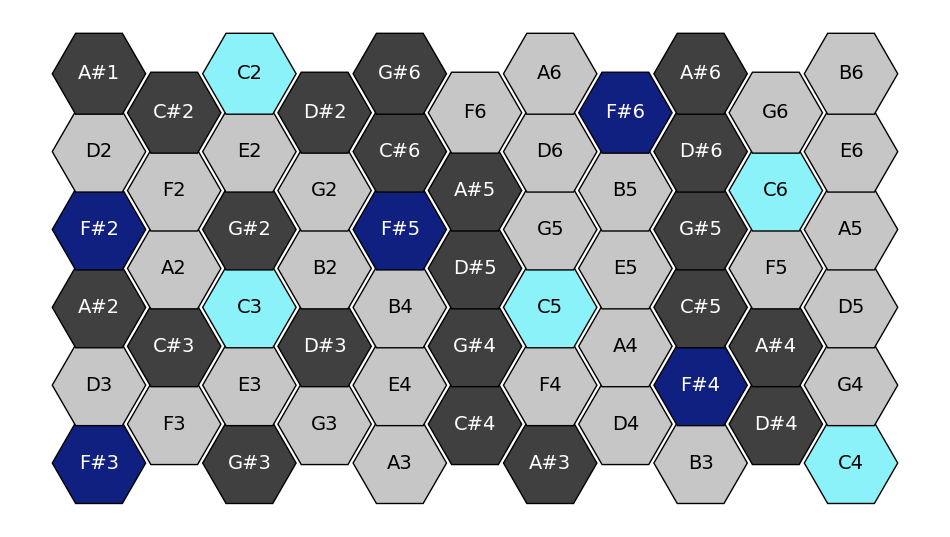

In [325]:
import matplotlib.pyplot as plt
import numpy as np

def note_number_to_name(note_number):
    """Convert MIDI note number to note name with sharps and flats."""
    if note_number == 0:
        return f""
    else:
        note_names_sharps = ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]
        octave = (note_number - 60) // 12
        note_name = note_names_sharps[note_number % 12]
    return f"{note_name}{octave + 4}"

def hexagon(ax, center, size, color, label, fontsize):
    """Draw a hexagon on the given axes."""
    angle = np.linspace(0, 2*np.pi, 7)
    x = center[0] + size * np.cos(angle)
    y = center[1] + size * np.sin(angle)
    ax.fill(x, y, color=color, edgecolor='k')
    if sum(color) > 1:
        tx_color = 'black'
    else:
        tx_color = 'white'
    ax.text(center[0], center[1], label, ha='center', va='center', color=tx_color, fontsize=fontsize)

def create_hexagonal_keyboard(notes, r, g, b):
    """Create an image of a hexagonal keyboard."""
    fig, ax = plt.subplots(figsize=(12, 7))

    column_width = 2 * np.cos(np.pi / 12)  # Width of a hexagon column
    row_height = 1  # Height of a hexagon row
    size = 0.6  # Size of hexagons
    fontsize = 14  # Font size of note labels

    for col in range(11):
        if col % 2 == 0:
            for row in range(6):
                index = (col+1) * 5 - row + round(col/2)
                center = ((col-1) * column_width/2, row * row_height)
                hexagon(ax, center, size=size, color=(r[index]/80, g[index]/80, b[index]/80), label=notes[index], fontsize=fontsize)
        else:
            for row in range(5):
                index = (col+1) * 5 - row + round((col-1)/2)
                center = ((col-1)  * column_width/2, row * row_height + row_height / 2)
                hexagon(ax, center, size=size, color=(r[index]/80, g[index]/80, b[index]/80), label=notes[index], fontsize=fontsize)

    ax.set_aspect('equal')
    ax.axis('off')
    plt.show()

# Example usage
#midi_notes = [60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120]
#notes = [note_number_to_name(n) for n in notes]
#r = [255,0,255,0,255,255,0] * 9  # Replace with your actual RGB values
#g = [0,255,0,255,255,0,255] * 9
#b = [255,0,255,255,0,0,255] * 9

create_hexagonal_keyboard(notes, r, g, b)


In [319]:
notes = layout_vertical(30, [[3,3],[3,2]], [5,5], [3,-3], [4,1], 2*12+8, [2,1,0])
r, g, b, = note_colours(notes, axis_cs)

In [326]:
notes = layout_horizontal(34, [2,1], [4,-7], [3,-3], 5*12-4, 5)
colours = note_colours(notes, axis_cs)

In [327]:
r, g, b = colours